In [1]:
import numpy as np
import pandas as pd
import csv
import re
import sys


In [2]:
names = ['tweetID', 'userID', 'st', 'ed', 'token', 'tag']
df = pd.read_csv('train_data.tsv', delimiter='\t', names = names, header=None)

# Had to remove '"' entries from the 'train_data.tsv' file as they interfere in the reading/parsing of read_csv
# process.

In [3]:
names = ['tweetID', 'userID', 'st', 'ed', 'token', 'tag']
df1 = pd.read_csv('dev_data.tsv', delimiter='\t', names = names, header=None)

In [4]:
df1.tail()

,tweetID,userID,st,ed,token,tag
9231,440335514835509248,21327323,92,93,it,en
9232,440335514835509248,21327323,94,94,",",other
9233,440335514835509248,21327323,96,99,then,en
9234,440335514835509248,21327323,101,104,CORY,other
9235,440335514835509248,21327323,106,115,interrupts,en


In [5]:
df.tail()

,tweetID,userID,st,ed,token,tag
91206,274639523219120128,336199483,22,25,very,en
91207,274639523219120128,336199483,27,31,tired,en
91208,274639523219120128,336199483,32,32,",",other
91209,274639523219120128,336199483,34,42,exhausted,en
91210,274639523219120128,336199483,44,45,:),other


In [6]:
dt = [df, df1]
D = pd.concat(dt)

In [7]:
D.tail()

,tweetID,userID,st,ed,token,tag
9231,440335514835509248,21327323,92,93,it,en
9232,440335514835509248,21327323,94,94,",",other
9233,440335514835509248,21327323,96,99,then,en
9234,440335514835509248,21327323,101,104,CORY,other
9235,440335514835509248,21327323,106,115,interrupts,en


In [8]:
words = list(set(D["token"].values))
n_words = len(words); n_words

15574

In [9]:
tags = list(set(D["tag"].values))
n_tags = len(tags); n_tags #es, en, other

3

In [10]:
# Training data
t_id = df['tweetID'][0]
u_id = df['userID'][0]
tup = ()
sents_train = []
tmp_sent = []

for i in range(len(df)):
    if(t_id == df['tweetID'][i] and u_id == df['userID'][i]):
        tup = (str(df['token'][i]), str(df['tag'][i]))
        tmp_sent.append(tup)
    else:
        t_id = df['tweetID'][i]
        u_id = df['userID'][i]
        sents_train.append(tmp_sent)
        tmp_sent = []
        tup = (str(df['token'][i]), str(df['tag'][i]))
        tmp_sent.append(tup)

In [11]:
# Testing data
t_id = df1['tweetID'][0]
u_id = df1['userID'][0]
tup = ()
sents_test = []
tmp_sent = []

for i in range(len(df)):
    if(t_id == df['tweetID'][i] and u_id == df['userID'][i]):
        tup = (str(df['token'][i]), str(df['tag'][i]))
        tmp_sent.append(tup)
    else:
        t_id = df['tweetID'][i]
        u_id = df['userID'][i]
        sents_test.append(tmp_sent)
        tmp_sent = []
        tup = (str(df['token'][i]), str(df['tag'][i]))
        tmp_sent.append(tup)

In [12]:
# Preparation of Tokens

max_len = 75
max_len_char = 10

In [13]:
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [14]:
print(word2idx["love"])
print(tag2idx["en"])
print(tag2idx["es"])
print(tag2idx["other"])

13923
1
3
2


In [15]:
from keras.preprocessing.sequence import pad_sequences
X_word_tr = [[word2idx[w[0]] for w in s] for s in sents_train]
X_word_te = [[word2idx[w[0]] for w in s] for s in sents_test]

Using TensorFlow backend.


In [16]:
X_word_tr = pad_sequences(maxlen=max_len, sequences=X_word_tr, value=word2idx["PAD"], padding='post', truncating='post')
X_word_te = pad_sequences(maxlen=max_len, sequences=X_word_te, value=word2idx["PAD"], padding='post', truncating='post')

In [17]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)

312


In [18]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [19]:
# train char
X_char_tr = []
for sentence in sents_train:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char_tr.append(np.array(sent_seq))
    
# test char
X_char_te = []
for sentence in sents_test:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char_te.append(np.array(sent_seq))

In [20]:
y_tr = [[tag2idx[w[1]] for w in s] for s in sents_train]
y_te = [[tag2idx[w[1]] for w in s] for s in sents_test]

In [21]:
y_tr = pad_sequences(maxlen=max_len, sequences=y_tr, value=tag2idx["PAD"], padding='post', truncating='post')
y_te = pad_sequences(maxlen=max_len, sequences=y_te, value=tag2idx["PAD"], padding='post', truncating='post')

In [22]:
# from sklearn.model_selection import train_test_split

# X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.1, random_state=2018)
# X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.1, random_state=2018)

In [23]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D

In [24]:
# input and embedding for words
word_in = Input(shape=(max_len,))
emb_word = Embedding(input_dim=n_words + 2, output_dim=20,
                     input_length=max_len, mask_zero=True)(word_in)

# input and embeddings for characters
char_in = Input(shape=(max_len, max_len_char,))
emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=True))(char_in)
# character LSTM to get word encodings by characters
char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.5))(emb_char)

# main LSTM
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(0.3)(x)
main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.6))(x)
out = TimeDistributed(Dense(n_tags + 1, activation="softmax"))(main_lstm)

model = Model([word_in, char_in], out)

In [25]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_crossentropy"])

In [26]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 10)       0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 75)           0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 75, 10, 10)   3140        input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 75, 20)       311520      input_1[0][0]                    
__________________________________________________________________________________________________
time_distr

In [27]:
history = model.fit([X_word_tr,
                     np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))],
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=256, epochs=5, validation_split=0.2, verbose=1)

Train on 5919 samples, validate on 1480 samples
Epoch 1/5
5919/5919 [==============================] - 35s 6ms/step - loss: 1.2980 - sparse_categorical_crossentropy: 1.2980 - val_loss: 1.0856 - val_sparse_categorical_crossentropy: 1.0856
Epoch 2/5
5919/5919 [==============================] - 31s 5ms/step - loss: 1.0314 - sparse_categorical_crossentropy: 1.0314 - val_loss: 0.8807 - val_sparse_categorical_crossentropy: 0.8807
Epoch 3/5
5919/5919 [==============================] - 30s 5ms/step - loss: 0.7884 - sparse_categorical_crossentropy: 0.7884 - val_loss: 0.7439 - val_sparse_categorical_crossentropy: 0.7439
Epoch 4/5
5919/5919 [==============================] - 30s 5ms/step - loss: 0.6167 - sparse_categorical_crossentropy: 0.6167 - val_loss: 0.6201 - val_sparse_categorical_crossentropy: 0.6201
Epoch 5/5
5919/5919 [==============================] - 30s 5ms/step - loss: 0.4891 - sparse_categorical_crossentropy: 0.4891 - val_loss: 0.4738 - val_sparse_categorical_crossentropy: 0.4738


In [28]:
hist = pd.DataFrame(history.history)

In [29]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.show()

<Figure size 1200x1200 with 1 Axes>

In [30]:
y_pred = model.predict([X_word_te,
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char))])

In [31]:
len(y_pred)

7400

In [32]:
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")

Y1 = []
Y2 = []

for i in range(len(y_pred)):
    p = np.argmax(y_pred[i], axis=-1)
    for w, t, pred in zip(X_word_te[i], y_te[i], p):
        if w != 0:
            print("{:15}: {:5} {}".format(idx2word[w], idx2tag[t], idx2tag[pred]))
            Y1.append(idx2tag[t])
            Y2.append(idx2tag[pred])

Word           ||True ||Pred
Bambino        : other es
:D             : other other
@JhonCristian  : other es
♡              : other other
<<<            : other other
@Audreyy_torres: other es
mhmmm          : other en
-.-            : other other
Ummm           : other es
...            : other other
Ummm           : other en
@Monimaravilla19: other es
*              : other other
jk             : en    en
Ewwww          : other en
@Audreyy_torres: other en
whoaaaa        : en    en
lol            : en    en
@sanluispotoyees: other es
.?..           : other other
@Yessy1584G    : other other
-.-            : other other
@sanluispotoyees: other es
*              : other other
183            : other other
...            : other other
-.-            : other other
Work           : en    en
Tomorrow       : en    en
!              : other other
10             : other en
days           : en    en
till           : en    en
payday         : en    en
!              : other other
;)           

@sanluispotoyees: other en
why            : en    en
not            : en    en
?              : other en
After          : en    en
practice       : en    en
?              : other other
@sanluispotoyees: other other
:              : other other
Man            : en    en
I              : en    en
miss           : en    en
him            : en    en
He             : en    en
Misses         : en    en
You            : en    en
Too            : en    en
♥              : other other
@WTFLifeFacts  : other en
this           : en    en
makes          : en    en
sense          : en    en
:              : other other
0              : other other
@FriendlyAssh0le: other en
:              : other other
only           : en    en
reason         : en    en
i              : en    en
would          : en    en
date           : en    en
a              : en    en
black          : en    en
girl           : en    en
is             : en    en
because        : en    en
majority       : en    en
of            

its            : en    en
still          : en    en
annoying       : en    en
lol            : en    en
bht            : en    en
you            : en    en
're            : en    en
fucking        : en    en
stunning       : en    en
;)             : other other
@elizaaaabethhh_: other es
@CiinthiiaRm   : other en
lol            : en    en
NOOO           : en    en
hahahaha       : en    en
@sanluispotoyees: other en
ur             : en    en
one            : en    en
of             : en    en
them           : en    en
sometimes      : en    en
-.-            : other other
@elizaaaabethhh_: other en
@CiinthiiaRm   : other en
when           : en    en
we             : en    en
have           : en    en
kids           : en    en
lol            : en    en
which          : en    en
is             : en    en
NOT            : en    en
ANYTIME        : en    en
SOON           : en    en
!!!!           : other en
I              : en    en
hope           : en    en
lmao           : en    en
:) 

Andele         : es    es
guey           : es    es
Todavia        : es    es
hay            : es    es
tiempo         : es    es
!              : other other
Vamos          : es    es
rebaño         : es    es
por            : es    es
el             : es    es
empate         : es    es
y              : es    es
el             : es    es
gane           : es    es
!              : other es
Vergas         : es    es
Onta           : es    es
la             : es    es
defensa        : es    es
!?!?!          : other es
No             : es    es
pasa           : es    es
nada           : es    es
!              : other es
#VengaReba     : es    es
ño             : es    es
Ya             : es    es
ta             : es    es
muy            : es    es
viejio         : es    es
Ni             : es    es
lo             : es    es
toco           : es    es
Se             : es    es
cayo           : es    es
solo           : es    es
!              : other other
😁              : other other
Hay

pregunta       : es    es
te             : es    es
preguntan      : es    es
si             : es    es
sabes          : es    es
,              : other es
la             : es    es
segunda        : es    es
dónde          : es    es
están          : es    es
,              : other es
el             : es    es
verbo          : es    es
se             : es    es
pone           : es    es
al             : es    es
final          : other es
cuando         : es    es
la             : es    es
pregunta       : es    es
es             : es    es
indirecta      : es    es
@VitelioQuintero: other en
Hi             : en    en
Eng            : other en
Quintero       : other en
:)             : other other
Welcome        : en    en
to             : en    en
our            : en    en
community      : en    en
.              : other en
Let            : en    en
's             : en    en
stay           : en    en
in             : en    en
touch          : en    en
:)             : other en
hope    

@hellachingona : other en
weakkkkk       : en    en
ha             : en    en
..             : other en
What           : en    en
happened       : en    en
o              : en    en
wut            : en    en
My             : en    en
ankle          : en    en
is             : en    en
hurting        : en    en
nasty          : en    en
:(             : other other
@hellachingona : other en
haha           : en    en
do             : en    en
a              : en    en
replay         : en    en
you            : en    en
ai             : en    en
n't            : en    en
down           : en    en
!!!            : other other
@arelyyy_090812: other es
callate        : es    es
@hellachingona : other en
ha             : en    en
them           : en    en
hoes           : en    en
be             : en    en
wreckin        : en    en
o              : en    en
wut            : en    en
@hellachingona : other en
ha             : en    en
ey             : en    en
daw            : en    en
I     

the            : en    en
links          : en    en
be             : en    en
lagging        : en    en
@Loco93john    : other en
haha           : en    en
yeah           : en    en
that           : en    en
dam            : en    en
nigger         : en    en
WEAKKKKKK      : en    other
!!!!!          : other other
Ugly           : en    en
shot           : en    en
by             : en    en
cleverly       : en    en
Fuckin         : en    en
post           : en    en
!!!!           : other other
7              : other en
more           : en    en
minutes        : en    en
RED            : en    es
CARD           : en    other
!              : other other
!              : other other
Knee           : en    en
to             : en    en
the            : en    en
face           : en    en
POW            : en    en
!              : other other
What           : en    en
a              : en    en
goal           : en    en
Not            : en    en
another        : en    en
injury         : 

Yesenia        : other es
Ya             : es    es
Llegaron       : es    es
Uff            : other es
☺              : other other
️              : other other
☺              : other other
️              : other other
❤              : other other
️              : other other
❤              : other other
️👌             : other other
I              : en    en
me             : es    es
Lleva          : es    es
en             : es    es
Su             : es    es
Moto           : es    es
Uff            : es    es
👌              : other other
Cuando         : es    es
Mande          : es    es
a              : es    es
Toño           : other es
a              : es    es
la             : es    es
Chingada       : es    es
>>             : other es
I              : en    en
Luego          : es    es
conosi         : es    es
a              : es    es
Jonny          : other es
😍👌             : other other
The            : en    en
day            : en    en
I              : en    en
went    

Soon           : en    en
c              : other other
:              : other other
@princessstacy_: other es
@chelita1123   : other other
Look           : en    other
Honey          : en    other
1              : other other
.              : other other
Es             : es    other
EDWIN          : other other
2              : other other
.              : other other
Campeon        : es    en
is             : en    en
already        : en    en
mine           : en    en
since          : en    en
days           : en    en
ago            : en    en
3              : other en
.              : other other
Idk            : other en
what           : en    en
Pero           : es    en
their          : en    en
mine           : en    en
😭              : other other
❤              : other other
️              : other other
When           : en    en
my             : en    en
cousins        : en    en
wanna          : en    en
come           : en    en
to             : en    en
Austin         : ot

hour           : en    en
usually        : en    en
means          : en    en
these          : en    en
niggas         : en    en
are            : en    en
startin        : en    en
their          : en    en
work           : en    en
day            : en    en
!              : other other
#MexicansPutInWork: en    en
#LosGuerosNo   : other en
@ibrandx_      : other en
was            : en    en
that           : en    en
a              : en    en
Sun            : en    en
Conure         : other en
?              : other other
(              : other other
0.0            : other other
)              : other other
^0             : other other
^              : other other
?              : other other
:/             : other other
@tinaandersonOC: other en
NP             : other en
!              : other other
I              : en    en
just           : en    en
could          : en    en
n't            : en    en
agree          : en    en
more           : en    en
,              : other en
there

tengo          : es    es
casas          : es    es
pa             : es    es
escojer        : es    es
!              : other es
Ay             : es    es
tan            : es    es
un             : es    es
chingo         : es    es
de             : es    es
puentes        : es    es
;)             : other es
jajaja         : es    es
ahora          : es    es
tapate         : es    es
el             : es    es
osico          : es    es
o              : es    es
te             : es    es
lo             : es    es
tapo           : es    es
8              : other es
=              : other other
==D            : other other
O:             : other other
@sanluispotoyees: other es
mira           : es    es
babosillaaa    : es    es
tapame         : es    es
el             : es    es
quiote         : es    es
y              : es    es
no             : es    es
mames          : es    es
lmfao          : en    es
xD             : other other
@sanluispotoyees: other es
Yo             : es    e

what           : en    en
?              : other other
:)             : other other
si             : es    es
es             : es    es
ke             : es    es
no             : es    es
es             : es    es
TopSecret      : en    es
lol            : en    en
@brissamayen   : other es
hahaha         : en    en
soy            : es    es
faniii         : other en
lol            : en    en
jk             : es    en
@_shedopeee    : other en
Suele          : es    en
Suceder        : es    other
..             : other other
I              : en    en
usually        : en    en
do             : en    en
the            : en    en
same           : en    en
cuando         : es    en
me             : es    en
encelo         : es    en
over           : en    en
my             : en    en
gf             : en    en
:/             : other other
♥              : other other
@brissamayen   : other es
She            : en    en
woulda         : en    en
been           : en    en
like           : en 

!              : other es
Hazte          : es    es
algo           : es    es
tu             : es    es
o              : es    es
esperate       : es    es
!!             : other other
Yo             : en    other
!              : other en
Where          : en    en
the            : en    en
fuck           : en    en
my             : en    en
mom            : en    en
at             : en    en
?              : other other
Traigo         : es    es
Hambre         : es    es
y              : es    es
Ella           : es    es
de             : es    es
callejera      : es    es
No             : es    es
!              : other es
No             : es    es
!              : other es
No             : en    es
!              : other es
No             : es    es
!!!            : other es
Yo             : es    es
quiero         : es    es
Breakfast      : en    es
k              : other es
se             : es    es
venga          : es    es
Home           : en    es
NOW            : en    other


@Milyl15       : other es
hola           : es    es
😋              : other other
@Guera_Unica   : other es
igual          : es    es
mente          : es    es
😘              : other other
☺              : other other
De             : es    es
los            : es    es
pies           : es    es
ala            : es    es
cabeza         : es    es
es             : es    es
bajito         : es    es
de             : es    es
estatura       : es    es
,              : other es
de             : es    es
la             : es    es
cabeza         : es    es
hasta          : es    es
el             : es    es
cielo          : es    es
yo             : es    es
le             : es    es
cálculo        : es    es
su             : es    es
altura         : es    es
!              : other other
🔫💯👊            : other other
@LuuFive       : other es
no             : es    es
se             : es    es
aguiten        : es    es
✋              : other es
@xobrieee_     : other es
suerte         : es    

no             : es    es
ayan           : es    es
otra           : es    es
cosa           : es    es
k              : es    es
haser          : es    es
@crystal_jaimes: other other
toa            : en    en
booty          : en    en
hurt           : en    en
..             : other en
lmao           : en    en
Its            : en    en
alright        : en    en
you            : en    en
got            : en    en
me             : en    en
thats          : en    en
all            : en    en
u              : en    en
need           : en    en
haga           : es    en
jkjk           : en    en
When           : en    en
people         : en    en
ask            : en    en
you            : en    en
what           : en    en
are            : en    en
your           : en    en
plans          : en    en
for            : en    en
valentines     : en    en
.....          : other en
&              : other en
They           : en    en
know           : en    en
you            : en    en
single   

Fml            : en    en
the            : en    en
library        : en    en
doesnt         : en    en
open           : en    en
until          : en    en
7:30           : other en
am             : en    en
-__-           : other other
Good           : en    en
morning        : en    en
tweps          : en    en
!              : other other
:)             : other other
Now            : en    en
instead        : en    en
of             : en    en
text           : en    en
we             : en    en
tweet          : en    en
!!             : other other
:D             : other other
Shes           : en    en
my             : en    en
nigga          : en    en
I              : en    en
swear          : en    en
...            : other other
I              : en    en
be             : en    en
having         : en    en
the            : en    en
craziest       : en    en
dreams         : en    en
-__-           : other other
Im             : en    en
over           : en    en
it             : 

you            : en    en
feeling        : en    en
low            : en    en
...            : other other
sleepless      : en    en
nights         : en    en
endless        : en    en
thoughts       : en    en
@loud__thoughts: other en
:              : other en
do             : en    en
n't            : en    en
really         : en    en
know           : en    en
what           : en    en
to             : en    en
feel           : en    en
anymore        : en    en
.              : other other
@Loco_Saucedo  : other en
its            : en    en
fucking        : en    en
hilarious      : en    en
!              : other other
!              : other other
:D             : other other
This           : en    en
movie          : en    en
has            : en    en
me             : en    en
rolling        : en    en
....           : other en
its            : en    en
a              : en    en
big            : en    en
black          : en    en
D              : en    other
,              : oth

and            : en    en
math           : en    en
the            : en    en
whole          : en    en
day            : en    en
is             : en    en
not            : en    en
easy           : en    en
my             : en    en
respects       : en    en
to             : en    en
the            : en    en
accountants    : en    en
!!!            : other en
#realTalk      : en    en
Fucking        : en    en
traffic        : en    en
!!!!!!!!!!!!!  : other en
Uggh           : en    en
We             : en    en
live           : en    en
in             : en    en
the            : en    en
same           : en    en
building       : en    en
but            : en    en
got            : en    en
different      : en    en
views          : en    en
!!!!!          : other other
@crystal_jaimes: other es
No             : en    es
!!             : other other
:/             : other other
This           : en    en
has            : en    en
never          : en    en
happened       : en    en
to 

@_itskayyyyy   : other en
idk            : en    en
I              : en    en
'm             : en    en
pretty         : en    en
high           : en    en
rn             : en    en
#grifomelarifo : en    en
@_itskayyyyy   : other en
professional   : en    en
meme           : en    en
hunter         : en    en
😂😂😂            : other other
@_itskayyyyy   : other en
lmao           : en    en
and            : en    en
add            : en    en
them           : en    en
to             : en    en
your           : en    en
collection     : en    en
or             : en    en
what           : en    en
😂😂             : other other
@_itskayyyyy   : other en
do             : en    en
you            : en    en
make           : en    en
these          : en    en
yourself       : en    en
or             : en    en
??             : other other
@_itskayyyyy   : other en
lol            : en    en
I              : en    en
ran            : en    en
out            : en    en
of             : en    en
mem

for            : en    en
no             : en    en
apparent       : en    en
reason         : en    en
when           : en    en
your           : en    en
around         : en    en
them           : en    en
,              : other en
unless         : en    en
your           : en    en
high           : en    en
lmao           : en    en
@LaughWithAshley: other en
I              : en    en
read           : en    en
at             : en    en
a              : en    en
college        : en    en
level          : en    en
and            : en    en
I              : en    en
smoke          : en    en
all            : en    en
the            : en    en
weed           : en    en
I              : en    en
want           : en    en
,              : other en
till           : en    en
this           : en    en
day            : en    en
I              : en    en
can            : en    en
still          : en    en
read           : en    en
fluently       : en    en
and            : en    en
accurately 

and            : en    en
for            : en    en
a              : en    en
couple         : en    en
more           : en    en
seshes         : en    en
@Meow_Amy69    : other en
just           : en    en
by             : en    en
listening      : en    en
to             : en    en
Spanish        : en    en
music          : en    en
will           : en    en
help           : en    en
you            : en    en
understand     : en    en
how            : en    en
to             : en    en
speak          : en    en
it             : en    en
x              : en    en
)              : other en
,              : other other
I              : en    en
was            : en    en
just           : en    en
sayin          : en    en
what           : en    en
have           : en    en
you            : en    en
been           : en    en
up             : en    en
too            : en    en
?              : other other
gunna          : en    en
knock          : en    en
out            : en    en
in    

al             : es    es
hablar         : es    es
si             : es    es
uno            : es    es
dice           : es    es
eso            : es    es
,              : other es
inmediatamente : es    es
se             : es    es
entiende       : es    es
buena          : es    es
suerte         : es    es
,              : other es
las            : es    es
personas       : es    es
en             : es    es
realidad       : es    es
no             : es    es
saben          : es    es
el             : es    es
origen         : es    es
@titodonoso    : other es
tienes         : es    es
razón          : es    es
,              : other es
literal        : es    es
sería          : es    es
así            : es    es
,              : other es
casi           : es    es
no             : es    es
caigo          : es    es
en             : es    es
cuenta         : es    es
trato          : es    es
de             : es    es
no             : es    es
hacer          : es    es
traducciones

en             : es    es
una            : es    es
situación      : es    es
y              : es    es
sientes        : es    es
como           : es    es
si             : es    es
hubieras       : es    es
estado         : es    es
en             : es    es
ella           : es    es
antes          : es    es
.              : other es
@maromadigital : other es
jajaja         : es    es
no             : es    es
lo             : es    es
había          : es    es
escuchado      : es    es
:)             : other other
@gmeschin      : other es
jajajajajjaaja : es    es
,              : other es
al             : es    es
menos          : es    es
no             : es    es
eres           : es    es
el             : es    es
único          : es    es
:)             : other other
:)             : other other
:)             : other other
@viadelmar     : other es
he             : es    es
venido         : es    es
trabajando     : es    es
en             : es    es
la             : es    es


Me             : es    es
ba             : es    es
a              : es    es
matar          : es    es
!              : other other
-_-            : other other
Como           : es    es
as             : es    es
estado         : es    es
?              : other es
@27groberto    : other es
Un             : es    es
hombre         : es    es
de             : es    es
acciones       : es    es
y              : es    es
no             : es    es
d              : es    es
palabras       : es    es
!!!            : other es
Por            : es    es
k              : es    es
esas           : es    es
se             : es    es
la             : es    es
lleba          : es    es
el             : es    es
viento         : es    es
<<             : other es
El             : es    es
hombre         : es    es
k              : es    es
juega          : es    es
con            : es    es
todas          : es    es
las            : es    es
paga           : es    es
con            : es    es
una   

no             : es    es
te             : es    es
basto          : es    es
...            : other es
aun            : es    es
k              : es    es
as             : es    es
sido           : es    es
mi             : es    es
peor           : es    es
error          : es    es
!              : other other
Nunca          : es    es
me             : es    es
acuerdo        : es    es
de             : es    es
olvidarte      : es    es
♡              : other es
Y              : es    es
si             : es    es
te             : es    es
salude         : es    es
fue            : es    es
pura           : es    es
cortesia       : es    es
<<             : other es
La             : es    es
vida           : es    es
da             : es    es
mil            : es    es
vueltas        : es    es
yo             : es    es
t              : es    es
lo             : es    es
abise          : es    es
,              : other es
ahora          : es    es
estas          : es    es
abajo    

soledad        : es    es
@JhonCristian  : other es
:              : other es
No             : es    es
te             : es    es
preocupes      : es    es
por            : es    es
las            : es    es
cosas          : es    es
que            : es    es
dejaste        : es    es
en             : es    es
el             : es    es
pasado         : es    es
,              : other es
por            : es    es
alguna         : es    es
razon          : es    es
no             : es    es
quisieron      : es    es
estar          : es    es
en             : es    es
tu             : es    es
futuro         : es    es
Porque         : es    es
yo             : es    es
eh             : es    es
sido           : es    es
la             : es    es
primera        : es    es
,              : other es
la             : es    es
mejor          : es    es
,              : other es
la             : es    es
verdadera      : es    es
,              : other es
La             : es    es
Original    

️              : other other
But            : en    en
Rip            : en    en
😪😔🙏            : other other
When           : en    en
is             : en    en
my             : en    en
dad            : en    en
getting        : en    en
here           : en    en
😏              : other en
I              : en    en
remember       : en    en
when           : en    en
my             : en    en
mom            : en    en
was            : en    en
gonna          : en    en
hit            : en    en
me             : en    en
&              : other en
my             : en    en
nephew         : en    en
started        : en    en
crying         : en    en
😂😂😂😂😂😭😭        : other other
❤              : other other
️              : other other
❤              : other other
️              : other other
❤              : other other
️              : other other
☺              : other other
️              : other other
☺              : other other
️              : other other
Because        : en    en

😠              : other en
@ToCoolRebecca : other en
Uyy            : en    en
get            : en    en
it             : en    en
(;             : other other
!              : other other
@ToCoolRebecca : other en
Why            : en    en
Lol            : en    en
too            : en    en
funny          : en    en
I              : en    en
keep           : en    en
bumping        : en    en
into           : en    en
the            : en    en
walls          : en    en
😐🔫😂            : other en
So             : en    en
Dv             : en    en
has            : en    en
no             : en    other
delay          : en    en
?              : other other
😳              : other en
I              : en    en
just           : en    en
told           : en    en
my             : en    en
mom            : en    en
we             : en    en
did            : en    en
@chelita1123   : other en
Lmfaoo         : en    en
Fuck           : en    en
You            : en    en
😂😂😂            : other oth

I              : en    en
did            : en    en
n't            : en    en
understand     : en    en
nothing        : en    en
today          : en    en
in             : en    en
church         : en    en
class          : en    en
.__.           : other other
!              : other other
@princessstacy_: other es
@TheBucktList  : other en
omg            : en    en
Yess           : en    en
😍😍             : other other
❤              : other other
️              : other other
Well           : en    en
church         : en    en
later          : en    en
😎              : other other
❤              : other other
️              : other other
I              : en    en
'm             : en    en
so             : en    en
fat            : en    en
it             : en    en
ai             : en    en
n't            : en    en
cute           : en    en
anymore        : en    en
😳😭             : other en
We             : en    en
have           : en    en
n't            : en    en
talked        

tampoco        : es    es
será           : es    es
cuando         : es    es
tu             : es    es
quieras        : es    es
.              : other es
#MyRule        : en    es
#ahuevo        : es    es
Lmao           : en    en
!              : other other
             : other en
ima            : en    en
turn           : en    en
into           : en    en
one            : en    en
foreal         : en    en
lol            : en    en
I              : en    en
told           : en    en
you            : en    en
!              : other en
I              : en    en
like           : en    en
Mexican        : en    en
chicks         : en    en
,              : other other
Mexican        : other en
food           : en    en
,              : other other
Mexican        : other en
jobs           : en    en
lol            : en    en
Hes            : en    en
something      : en    en
else           : en    en
!!!            : other other
:D             : other other
Back           : en    

.              : other es
:D             : other es
nah            : es    es
pero           : es    es
fue            : es    es
buen           : es    es
juego          : es    es
..             : other other
I              : en    en
feel           : en    en
like           : en    en
getting        : en    en
some           : en    en
J              : other en
's             : en    en
lk             : en    en
back           : en    en
in             : en    en
the            : en    en
day            : en    en
!!             : other other
:D             : other other
Did            : en    en
it             : en    en
snow           : en    en
in             : en    en
Austin         : other en
?              : other en
Wtf            : en    en
I              : en    en
did            : en    en
n't            : en    en
see            : en    en
any            : en    en
damn           : en    en
snow           : en    en
!              : other other
-_-            : other oth

El             : es    es
Goool          : es    es
💙😭😭💙💙😁         : other es
Eso            : es    es
que            : es    es
!!!            : other es
Vamos          : es    es
!!!!!          : other other
Si             : es    es
Me             : es    es
Kiere          : es    es
<3             : other other
@_MagalyTorres : other es
no             : es    es
pos            : es    es
Ora            : es    es
me             : es    es
dices          : es    es
😳😁             : other es
Se             : es    es
Acava          : es    es
El             : es    es
Tiempo         : es    es
😏              : other es
❤              : other other
️              : other other
Sin            : es    es
Compromiso     : es    es
❤              : other other
️              : other other
@_MagalyTorres : other es
Y              : es    es
Sii            : es    es
😌              : other other
❤              : other other
️              : other other
Kiero          : es    es
volverte   

Tu             : es    es
te             : es    es
bas            : es    es
y              : es    es
yo             : es    es
me             : es    es
boy            : es    es
al             : es    es
pederte        : es    es
voy            : es    es
ganando        : es    es
anda           : es    es
vete           : es    es
aver           : es    es
k              : es    es
encuentras     : es    es
y              : es    es
k              : es    es
te             : es    es
bendiga        : es    es
dios           : es    es
:)             : other es
I              : en    en
was            : en    en
going          : en    en
thru           : en    en
my             : en    en
pictures       : en    en
and            : en    en
I              : en    en
found          : en    en
a              : en    other
video          : en    es
donde          : es    es
me             : es    es
esta           : es    es
cantando       : es    es
la             : es    es
de       

por            : es    es
quien          : es    es
tmb            : es    es
...            : other other
lol            : en    en
@AlanTorres8484: other en
well           : en    en
duh            : en    en
thats          : en    en
how            : en    en
it             : en    en
should         : en    en
be             : en    en
..             : other other
si             : es    es
no             : es    es
k              : es    es
aburrido       : es    es
si             : es    es
nomas          : es    es
te             : es    es
digo           : es    es
hola           : es    es
..             : other es
lol            : en    en
No             : es    es
se             : es    es
awuite         : es    es
@crystal_jaimes: other es
k              : es    es
se             : es    es
awuiten        : es    es
los            : es    es
feos           : es    es
lol            : en    en
@AlanTorres8484: other en
lmao           : en    en
your           : en    en
alread

sober          : en    en
#sinprobelmas  : other en
Fasfa          : other en
gunna          : en    en
finally        : en    en
stop           : en    en
being          : en    en
bitch          : en    en
Still          : en    en
got            : en    en
some           : en    en
angus          : other en
burgers        : en    en
from           : en    en
yesterday      : en    en
@Izzy_teee     : other en
all            : en    en
bad            : en    en
then           : en    en
you            : en    en
wonder         : en    en
why            : en    en
people         : en    en
do             : en    en
n't            : en    en
come           : en    en
through        : en    en
#nopostacabron : other en
😂              : other other
@_itskayyyyy   : other en
why            : en    en
idk            : en    en
lol            : en    en
do             : en    en
you            : en    en
feel           : en    en
insecure       : en    en
?              : other en
Cuz      

you            : en    en
swear          : en    en
chris          : other en
gunna          : en    en
match          : en    en
a              : en    en
gram           : en    en
lol            : en    en
xd             : other en
#albad         : en    en
#lacrisiss     : es    other
@GMGA__        : other en
me             : en    en
nd             : en    en
chubbs         : other en
got            : en    en
our            : en    en
money          : en    en
together       : en    en
I              : en    en
doubt          : en    en
chris          : other en
will           : en    en
hvefeds        : en    en
nd             : en    en
my             : en    en
cuz            : en    en
coming         : en    en
from           : en    en
Ontario        : other en
in             : en    en
a              : en    en
bit            : en    en
tommy          : other en
aint           : en    en
invited        : en    en
cuz            : en    en
his            : en    en
bitch    

otra           : es    es
⚡              : other es
mas            : es    es
al             : es    es
🐯              : other other
ni             : es    es
pedo           : es    es
you            : en    en
gotta          : en    en
make           : en    en
your           : en    en
ferria         : es    en
somehow        : en    en
@vhc95         : other en
so             : en    en
you            : en    en
could          : en    en
attract        : en    en
a              : en    en
man            : en    en
duh            : en    en
!!             : other other
#buenconsejos  : es    en
@BallupWitCeeLos: other en
theres         : en    en
money          : en    en
to             : en    en
be             : en    en
made           : en    en
in             : en    en
real           : en    en
estate         : en    en
,              : other en
once           : en    en
you            : en    en
make           : en    en
the            : en    en
money          : en    en
gotta

👌              : other other
Bout           : en    en
to             : en    en
catch          : en    en
a              : en    en
flight         : en    en
with           : en    en
@ServeChubbs   : other en
🍁🔥😗💨💯✈         : other en
#grifomelarifo : es    en
@ivonii_       : other es
de             : es    es
nada           : es    es
frutada        : es    es
🍍              : other es
😊              : other es
#goodluck      : en    es
y              : es    es
que            : es    es
dios           : es    es
te             : es    es
bendigue       : es    es
lol            : en    en
@ivonii_       : other en
you            : en    en
've            : en    en
been           : en    en
knowing        : en    en
that           : en    en
tho            : en    en
lmao           : en    en
☺              : other en
,              : other en
that           : en    en
's             : en    en
firme          : es    en
!!             : other other
Sick           : en    en
fortun

up             : en    en
chris          : other en
tho            : en    en
@arianaesierra : other other
i              : en    en
saw            : en    en
a              : en    en
guy            : en    en
order          : en    en
a              : en    en
salad          : en    en
xque           : es    other
no             : es    other
queria         : es    other
engordar       : es    other
,              : other other
nd             : en    en
his            : en    en
girl           : en    en
a              : other en
big            : en    en
ass            : en    en
6              : other en
dollar         : en    en
burger         : en    en
from           : en    en
carlsjr        : other en
!!             : other other
,              : other other
#noposstacabron: es    other
@arianaesierra : other es
son            : es    es
puiro          : es    es
que            : es    es
mujeres        : es    other
!!!            : other other
lol            : en    en
,    

of             : en    en
ups            : en    en
&              : other en
down           : en    en
😱              : other en
like           : en    en
Omgg           : other en
&              : other en
their          : en    en
still          : en    en
together       : en    en
☺              : other other
️              : other other
❤              : other other
️              : other other
@Martin3zz10   : other en
Lmao           : en    en
Fuck           : en    en
You            : en    en
😒😂             : other en
Lmao           : en    en
it             : en    en
was            : en    en
funny          : en    en
😏😂💕            : other en
Nombre         : es    es
Que            : es    es
Triste         : es    es
Es             : es    es
Tener          : es    es
Un             : other es
Pinche         : es    es
Telefono       : es    es
I              : es    es
Que            : es    es
Nadien         : es    es
Te             : es    es
Hable          : es    es


's             : en    en
Sister         : en    en
😌              : other other
Since          : en    en
mcdonalds      : other en
was            : en    en
packed         : en    en
we             : en    en
going          : en    en
to             : en    en
jack           : en    en
in             : en    en
the            : en    en
box            : en    en
😌👌             : other en
McDonald       : other en
's             : en    en
be             : en    en
packed         : en    en
😳              : other en
Mcdonalds      : other es
(;             : other other
“              : other es
@rgomez68      : other es
:              : other es
El             : es    es
proximo        : es    es
sabado         : es    es
el             : es    es
Omnilife       : other es
se             : es    es
pintara        : es    es
de             : es    es
azul           : es    es
...            : other es
Chivas         : other es
buscara        : es    es
sumar          : es    es
un    

out            : en    en
:              : other other
Varias         : es    other
cosas          : es    other
una            : es    other
Hacer          : es    other
algo           : es    other
en             : es    other
abundancia     : es    other
We             : en    en
have           : en    en
lots           : en    en
of             : en    en
work           : en    en
to             : en    en
do             : en    en
,              : other en
let            : en    en
’s             : en    en
knock          : en    en
it             : en    en
out            : en    en
now            : en    en
so             : en    en
that           : en    en
later          : en    en
we             : en    en
can            : en    en
relax          : en    en
.              : other other
We             : en    en
’re            : en    en
done           : en    en
:              : other other
Ya             : other es
terminamos     : es    es
MUCHO          : es    es
más     

of             : en    en
the            : en    en
woods          : en    en
yet            : en    en
:              : other other
No             : other other
he             : es    en
salido         : es    en
del            : es    other
problema       : es    other
todavía        : es    other
Our            : en    en
sales          : en    en
went           : en    en
up             : en    en
last           : en    en
month          : en    en
,              : other en
but            : en    en
the            : en    en
company        : en    en
is             : en    en
not            : en    en
out            : en    en
of             : en    en
the            : en    en
woods          : en    en
yet            : en    en
.              : other other
Playing        : en    es
devil          : en    es
’s             : en    other
advocate       : en    es
:              : other other
Ser            : es    es
el             : es    es
abogado        : es    es
del           

encerrado      : es    other
.              : other other
Person         : en    other
1              : other other
:              : other other
Do             : en    en
you            : en    en
go             : en    en
out            : en    en
much           : en    en
?              : other other
Person         : en    en
2              : other other
:              : other other
No             : en    other
,              : other other
I              : en    en
just           : en    en
tend           : en    en
to             : en    en
keep           : en    en
to             : en    en
myself         : en    en
.              : other other
Under          : en    en
the            : en    en
bus            : en    en
:              : other other
Traicionar     : es    other
.              : other other
Mike           : other en
threw          : en    en
me             : en    en
under          : en    en
the            : en    en
bus            : en    en
,              : other

learn          : en    en
something      : en    en
new            : en    en
every          : en    en
single         : en    en
day            : en    en
Can            : en    en
you            : en    en
work           : en    en
my             : en    en
shift          : en    en
?              : other other
Me             : es    es
puedes         : es    es
reemplazar     : es    es
en             : es    es
el             : es    es
trabajo        : es    es
?              : other other
Get            : en    en
a              : en    en
feel           : en    en
of             : en    en
:              : other other
Tener          : es    en
una            : es    other
mejor          : es    other
idea           : en    other
.              : other other
I              : en    en
’m             : en    en
going          : en    en
to             : en    en
do             : en    en
my             : en    en
internship     : en    en
so             : en    en
I              : 

you            : en    en
out            : en    en
:              : other en
echarte        : es    en
I              : en    en
’m             : en    en
sorry          : en    en
but            : en    en
if             : en    en
you            : en    en
do             : en    en
n’t            : en    en
pay            : en    en
rent           : en    en
,              : other en
I              : en    en
’m             : en    en
gonna          : en    en
have           : en    en
to             : en    en
kick           : en    en
you            : en    en
out            : en    en
.              : other en
We             : en    en
can            : en    en
talk           : en    en
this           : en    en
through        : en    en
:              : other en
Solucionarlo   : es    en
conversando    : es    en
Let            : en    en
’s             : en    en
not            : en    en
fight          : en    en
,              : other en
we             : en    en
can         

going          : en    en
to             : en    en
hop            : en    en
in             : en    en
the            : en    en
shower         : en    en
real           : en    en
quick          : en    en
.              : other en
Everyone       : en    en
just           : en    en
hop            : en    en
in             : en    en
(              : other other
no             : es    es
se             : es    es
dice           : es    es
pero           : es    es
se             : es    es
entiende       : es    es
q              : es    es
es             : es    es
the            : en    en
car            : en    en
)              : other other
Heads          : en    es
up             : en    en
:              : other other
Alerta/Cuidado : es    other
(              : other other
en             : es    es
un             : es    es
juego/deporte  : es    other
)              : other other
Heads          : en    en
up             : en    en
!              : other other
Watch         

Just           : en    en
hang           : en    en
in             : en    en
there          : en    en
,              : other en
tough          : en    en
times          : en    en
will           : en    en
pass           : en    en
.              : other other
Hit            : en    en
the            : en    en
sack           : en    en
:              : other en
Acostarse      : es    en
I              : en    en
’m             : en    en
getting        : en    en
ready          : en    en
to             : en    en
hit            : en    en
the            : en    en
sack           : en    en
,              : other en
goodnight      : en    en
.              : other other
@isamarsvq     : other es
Buena          : es    es
idea           : es    es
!              : other es
las            : es    es
estoy          : es    es
subiendo       : es    es
a              : es    es
la             : es    es
website        : en    es
,              : other es
es             : es    es
q     

Yes            : en    en
,              : other other
he             : en    en
is             : en    en
.              : other other
Person         : en    en
1              : other other
:              : other other
Can            : en    en
you            : en    en
put            : en    en
him            : en    en
on             : en    en
the            : en    en
phone          : en    en
please         : en    en
?              : other other
Literalmente   : es    en
let            : en    en
me             : en    en
go             : en    en
es             : es    es
déjame         : es    other
ir             : es    other
y              : es    other
let            : en    en
go             : en    en
of             : en    en
me             : en    other
es             : es    es
suéltame       : es    es
,              : other other
aunque         : es    es
let            : en    en
me             : en    es
go             : en    en
se             : es    es
entiende

despues        : es    es
de             : es    es
can            : en    en
n't            : en    en
help           : en    en
but            : en    en
es             : es    es
infinitiv      : es    en
So             : en    en
much           : en    en
of             : en    en
a              : en    en
friend         : en    en
:              : other other
(              : other other
Expresión      : es    other
sarcástica     : es    other
)              : other other
Que            : es    es
tan            : es    es
buen           : es    es
amigo          : es    other
.              : other other
She            : en    en
hid            : en    en
many           : en    en
things         : en    en
from           : en    en
me             : en    en
,              : other en
so             : en    en
much           : en    en
of             : en    en
a              : en    en
friend         : en    en
.              : other other
What           : en    en
are           

idea           : en    en
sounds         : en    en
great          : en    en
,              : other en
but            : en    en
lets           : en    en
stick          : en    en
to             : en    en
the            : en    en
plan           : en    en
.              : other other
It             : en    en
does           : en    en
n’t            : en    en
add            : en    en
up             : en    en
:              : other other
No             : es    other
tiene          : es    en
sentido        : es    en
.              : other other
The            : en    en
world          : en    en
is             : en    en
going          : en    en
to             : en    en
end            : en    en
because        : en    en
the            : en    en
Mayan          : other en
calendar       : en    en
ends           : en    en
in             : en    en
2012           : other en
?              : other en
That           : en    en
does           : en    en
n’t            : en    en


Pizarro        : other en
wtf            : en    en
thought        : en    en
he             : en    en
retired        : en    en
Rosicky        : other es
el             : es    es
pinche         : es    es
drogadicto     : es    es
!              : other other
Only           : en    en
Bendtner       : other en
can            : en    en
make           : en    en
the            : en    en
comeback       : en    en
!              : other other
Muller         : other en
coming         : en    en
in             : en    en
!              : other other
Kroos          : other es
!              : other other
Good           : en    en
sub            : en    en
since          : en    en
Boateng        : other en
did            : en    en
have           : en    en
a              : en    en
yellow         : en    en
Bayern         : other en
gotta          : en    en
take           : en    en
advantage      : en    en
they           : en    en
're            : en    en
a              : en    en


:(             : other en
have           : en    en
a              : en    en
good           : en    en
one            : en    en
@Antifas_4ever : other en
I              : en    en
had            : en    en
never          : en    en
heard          : en    en
that           : en    en
one            : en    en
before         : en    en
,              : other en
I              : en    en
've            : en    en
heard          : en    en
get            : en    en
busy           : en    en
instead        : en    en
:)             : other other
@fullvicio     : other es
Thanks         : en    en
:)             : other other
BullyingIntimidación: en    en
Cyber          : en    en
bullying       : en    en
has            : en    en
become         : en    en
a              : en    en
widespread     : en    en
problem        : en    en
on             : en    en
social         : en    en
networking     : en    en
sites          : en    en
where          : en    en
kids           : en    en
t

,              : other en
you            : en    en
will           : en    en
like           : en    en
it             : en    en
(              : other en
I              : en    en
hope           : en    en
so             : en    en
:)             : other en
See            : en    en
you            : en    en
around         : en    en
!              : other other
About          : en    en
30             : other en
tweets/week    : en    en
30             : other en
sentences      : en    en
you            : en    en
could          : en    en
know           : en    en
by             : en    en
heart          : en    en
at             : en    en
the            : en    en
end            : en    en
of             : en    en
the            : en    en
week           : en    en
:)             : other en
if             : en    en
you            : en    en
want           : en    en
to             : en    en
learn          : en    en
them           : en    en
u              : en    en
need     

In [33]:
print(len(Y1))
print(len(Y2))

91201
91201


In [34]:
Y1.count('en')

46037

In [35]:
Y1.count('es')

25563

In [36]:
Y1.count('other')

19601

In [37]:
k = 91201
P1 = np.zeros((k,3), dtype=np.float32)
P2 = np.zeros((k,3), dtype=np.float32)

for i in range(k):
    if Y1[i]=='other':
        P1[i][0]=1.0
    elif Y1[i]=='en':
        P1[i][1]=1.0
    elif Y1[i]=='es':
        P1[i][2]=1.0
        
for i in range(k):
    if Y2[i]=='other':
        P2[i][0]=1.0
    elif Y2[i]=='en':
        P2[i][1]=1.0
    elif Y2[i]=='es':
        P2[i][2]=1.0

print(P1, P2)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]] [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


0 10614
1 51761
2 28826
[[ 8926   337  1351]
 [ 5871 44732  1158]
 [ 4804   968 23054]]


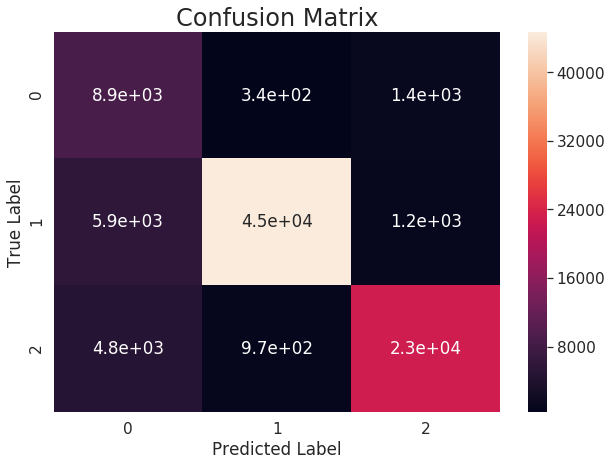

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

P1 = np.argmax(P1, axis=1)
for ix in range(3):
    print(ix, confusion_matrix(np.argmax(P2, axis=1), P1)[ix].sum())
cm = confusion_matrix(np.argmax(P2, axis=1), P1)
print(cm)

import seaborn as sn
import matplotlib.pyplot as plt
 
df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True)
sn.set_context("poster")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [39]:
target_names = ['other', 'en', 'es']
print(classification_report(np.argmax(P2, axis=1), P1, target_names=target_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(P2, axis=1), P1, normalize=True))

              precision    recall  f1-score   support

       other       0.46      0.84      0.59     10614
          en       0.97      0.86      0.91     51761
          es       0.90      0.80      0.85     28826

   micro avg       0.84      0.84      0.84     91201
   macro avg       0.78      0.83      0.78     91201
weighted avg       0.89      0.84      0.86     91201

0.8411311279481585
